In [46]:
import sys
import os

sys.path.append('../../src/')

from numpy import sin
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import numpy as np
import pandas as pd
from matplotlib import pyplot, pyplot as plt
import seaborn as sns
from numpy import sin

from utils.utils import train_data, plot_results

os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [47]:
name = "sin(x)"
function_to_approximate = lambda x: sin(10000 * x)

In [48]:
X_train, y_train = train_data(start=0, end=0.8, number=10000, f=function_to_approximate)

X_train_prepared = []
y_train_prepared = []
for i in range(100, len(X_train)):
    X_train_prepared.append(X_train[i - 100:i])
    y_train_prepared.append(y_train[i])
y_train_prepared = np.array(y_train_prepared)
X_train_prepared = np.array(X_train_prepared)
X_train_prepared = np.reshape(X_train_prepared, (9900, 100, 1))

In [49]:
regressor = Sequential()
regressor.add(LSTM(units=100, return_sequences=True, input_shape=(100, 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=100, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=100, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=100))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))
regressor.compile(optimizer='adam', loss='mean_squared_error')

In [50]:
regressor.fit(X_train_prepared, y_train_prepared, epochs=3, batch_size=256)

Epoch 1/3
39/39 [==============================] - 12s 234ms/step - loss: 0.4987
Epoch 2/3
39/39 [==============================] - 9s 231ms/step - loss: 0.5020
Epoch 3/3
39/39 [==============================] - 9s 226ms/step - loss: 0.5021


In [42]:
X_test, y_test = train_data(start=0, end=1.0, number=10000, f=function_to_approximate)
X_test_prepared = []
y_test_prepared = []
for i in range(100, len(X_train)):
    X_test_prepared.append(X_test[i - 100:i])
    y_test_prepared.append(y_test[i])
y_test_prepared = np.array(y_test_prepared)
X_test_prepared = np.array(X_test_prepared)
X_test_prepared = np.reshape(X_test_prepared, (9900, 100, 1))

mean_absolute_error = regressor.evaluate(X_test_prepared, y_test_prepared)

310/310 [==============================] - 7s 24ms/step - loss: 1.1703e-05


In [43]:
y_predicted = regressor.predict(X_test_prepared)

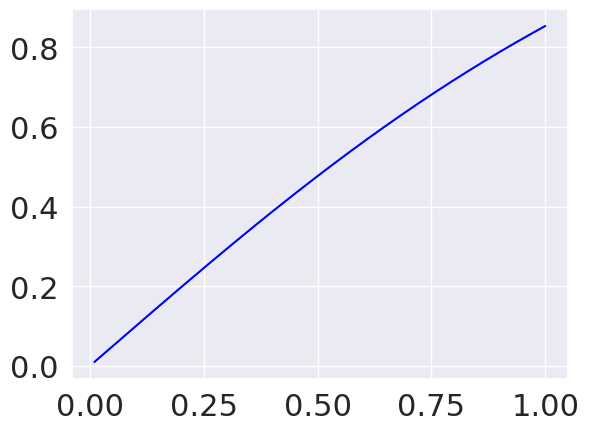

In [44]:
X_to_plot = []
y_to_plot = []
for i in range(0, len(X_test_prepared)):
    X_to_plot.append(X_test_prepared[i][len(X_test_prepared[i]) - 1][0])

sns.lineplot(x=X_to_plot, y=y_predicted.flatten(), color="blue")
plt.show()